<a href="https://colab.research.google.com/github/kiyong21c/pytorch_tutorial/blob/main/20220705_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(100, 1)
(100,)
torch.Size([100, 1])
최초 w = -0.0009385347366333008 최초 b = 0.1302180290222168
epoch: 10, loss = 4058.6868
epoch: 20, loss = 2860.1526
epoch: 30, loss = 2043.1572
epoch: 40, loss = 1486.1228
epoch: 50, loss = 1106.2524
epoch: 60, loss = 847.1462
epoch: 70, loss = 670.3766
epoch: 80, loss = 549.7557
epoch: 90, loss = 467.4325
epoch: 100, loss = 411.2368
최종 w = 63.84634017944336 최종 b = 0.3977162539958954


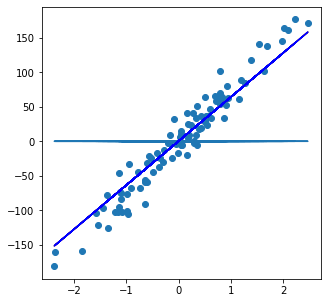

In [5]:
# linear regression

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data : noise가 들어간 선형 데이터셋 생성
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
print(X_numpy.shape) # (100, 1) : 2차원 배열
print(y_numpy.shape) # (100,) : 1차원 배열

# Prepare data 시각화
plt.figure(figsize=(5, 5))
plt.scatter(X_numpy, y_numpy)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32)) # torch.from_numpy(넘파이배열) : 텐서로 변환
y = torch.from_numpy(y_numpy.astype(np.float32)) # torch.Size([100])
y = y.view(y.shape[0], 1) # y.view(100, 1) : 1차원의 tensor [100]를 2차원 tensor로 [100, 1]
print(y.shape) # torch.Size([100, 1])

n_samples, n_features = X.shape # torch.Size([100, 1])

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

# 파라미터 확인
w, b = model.parameters()
print('최초 w =',w[0].item(), '최초 b =',b[0].item())
# 최초 파라미터 갱신전 plot
plt.plot(X, w[0].item()*X + b[0].item())

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step() # optimizer 내부로직에 의해 w, b가 갱신됨

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

print('최종 w =',w[0].item(), '최종 b =',b[0].item())
# 최종 파라미터 갱신후 plot(w, b를 이용해 그리는 방법)
plt.plot(X, w[0].item()*X + b[0].item())

# Plot
predicted = model(X).detach().numpy() # detach() : gradient가 전파되지 않는 텐서를 복사(= with torch.no_grad(): 와 같은 개념)

# 최종 파라미터 갱신후 plot(model(X))를 이용해 그리는 방법)
plt.plot(X_numpy, predicted, 'b') # numpy아닌 torch로도 그려짐
plt.show()